In [2]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.model_selection import cross_val_score

digits = load_digits()
X, y = digits.data, digits.target

tree_clf = DecisionTreeClassifier()
tree_scores = cross_val_score(tree_clf, X, y, cv=10)
answer_1 = tree_scores.mean()
print(f"Answer 1: {answer_1}")

Answer 1: 0.8191030415890751


In [3]:
bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)
bagging_scores = cross_val_score(bagging_clf, X, y, cv=10)
answer_2 = bagging_scores.mean()
print(f"Answer 2: {answer_2}")

Answer 2: 0.9270732464307884


In [5]:
n_features = int(np.sqrt(X.shape[1]))
bagging_clf_random_features = BaggingClassifier(estimator=DecisionTreeClassifier(max_features=n_features), n_estimators=100, random_state=42)
bagging_random_features_scores = cross_val_score(bagging_clf_random_features, X, y, cv=10)
answer_3 = bagging_random_features_scores.mean()
print(f"Answer 3: {answer_3}")


Answer 3: 0.9549224084419615


In [6]:
tree_clf_random_features = DecisionTreeClassifier(max_features=n_features)
bagging_clf_tuned = BaggingClassifier(estimator=tree_clf_random_features, n_estimators=100, random_state=42)
bagging_tuned_scores = cross_val_score(bagging_clf_tuned, X, y, cv=10)
answer_4 = bagging_tuned_scores.mean()
print(f"Answer 4: {answer_4}")

Answer 4: 0.9549224084419615


In [7]:
rf_clf = RandomForestClassifier(n_estimators=100, max_features=n_features, random_state=42)
rf_scores = cross_val_score(rf_clf, X, y, cv=10)
answer_5_rf = rf_scores.mean()
print(f"Random Forest Classifier Mean Accuracy: {answer_5_rf}")


Random Forest Classifier Mean Accuracy: 0.9493544382371197


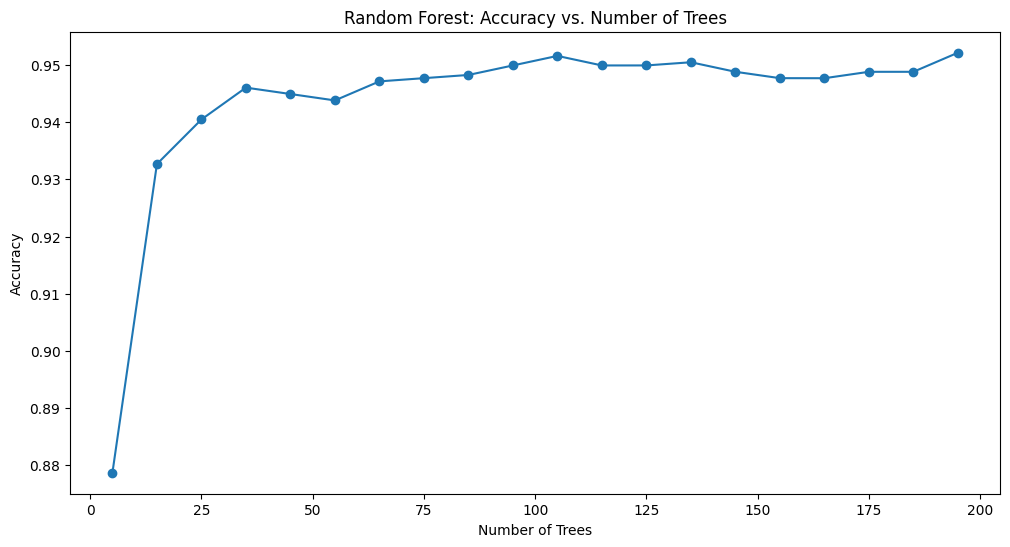

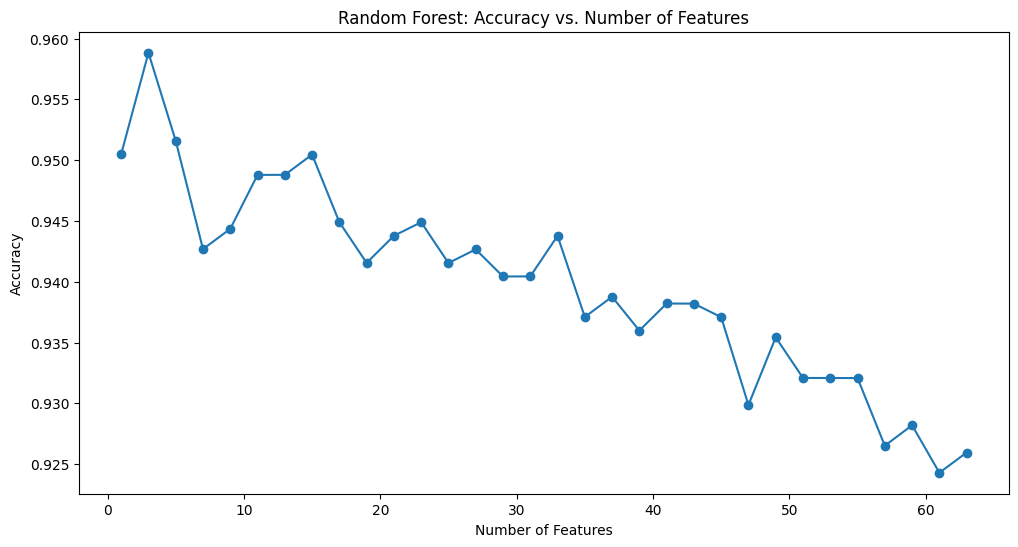

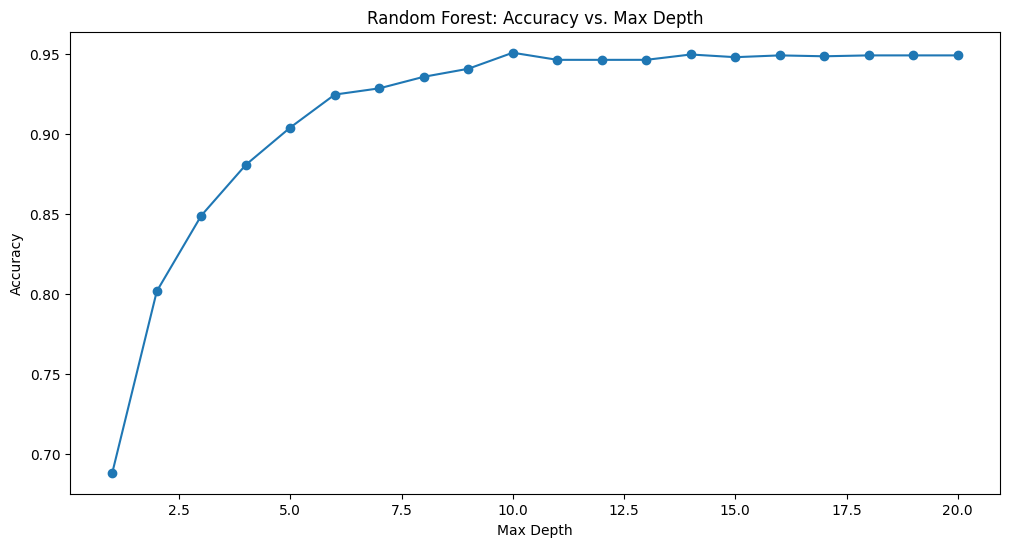

Answer 5: 2 3 4 7


In [8]:
import matplotlib.pyplot as plt

trees_range = range(5, 200, 10)
rf_scores_trees = []
for n_trees in trees_range:
    rf_clf = RandomForestClassifier(n_estimators=n_trees, max_features=n_features, random_state=42)
    scores = cross_val_score(rf_clf, X, y, cv=10)
    rf_scores_trees.append(scores.mean())

plt.figure(figsize=(12, 6))
plt.plot(trees_range, rf_scores_trees, marker='o')
plt.title('Random Forest: Accuracy vs. Number of Trees')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.show()

features_range = range(1, X.shape[1] + 1, 2)
rf_scores_features = []
for max_features in features_range:
    rf_clf = RandomForestClassifier(n_estimators=100, max_features=max_features, random_state=42)
    scores = cross_val_score(rf_clf, X, y, cv=10)
    rf_scores_features.append(scores.mean())

plt.figure(figsize=(12, 6))
plt.plot(features_range, rf_scores_features, marker='o')
plt.title('Random Forest: Accuracy vs. Number of Features')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.show()

depth_range = range(1, 21)
rf_scores_depth = []
for max_depth in depth_range:
    rf_clf = RandomForestClassifier(n_estimators=100, max_features=n_features, max_depth=max_depth, random_state=42)
    scores = cross_val_score(rf_clf, X, y, cv=10)
    rf_scores_depth.append(scores.mean())

plt.figure(figsize=(12, 6))
plt.plot(depth_range, rf_scores_depth, marker='o')
plt.title('Random Forest: Accuracy vs. Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.show()

answer_5 = "2 3 4 7"
print(f"Answer 5: {answer_5}")
